In [2]:
import pandas as pd
import wget
import matplotlib.pyplot as plt
from datetime import date, datetime


In [3]:
# filename = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
# wget.download(filename)

df_US = pd.read_csv("time_series_covid19_confirmed_US.csv")

df_US.columns = list(df_US.columns[:11]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df_US.columns[11:]]


In [4]:
df_US.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,133,135,135,136,136,136,136,136,136,139
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,11,13,13,13,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,923,974,1043,1068,1118,1213,1252,1298,1252,1416
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,51,51,51,51,53,53,53,53,54,54
5,84001001.0,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,23,24,26,26,25,26,28,30,32,33
6,84001003.0,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,87,91,101,103,109,112,117,123,132,143
7,84001005.0,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,11,12,14,15,18,20,22,28,29,30
8,84001007.0,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,18,22,24,26,28,32,32,34,33
9,84001009.0,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,16,17,18,20,20,21,22,26,29,31


In [5]:
us_melt_df = pd.melt(df_US, 
                     id_vars=["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Province_State", "Country_Region", "Lat", "Long_", "Combined_Key"], 
                     var_name="Date", 
                     value_name="Confirmed")
us_melt_df.head(100)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",2020-01-22,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",2020-01-22,0
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",2020-01-22,0
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",2020-01-22,0
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,84002230.0,US,USA,840,2230.0,Skagway,Alaska,US,59.561500,-135.333775,"Skagway, Alaska, US",2020-01-22,0
96,84002240.0,US,USA,840,2240.0,Southeast Fairbanks,Alaska,US,63.876921,-143.212764,"Southeast Fairbanks, Alaska, US",2020-01-22,0
97,84002261.0,US,USA,840,2261.0,Valdez-Cordova,Alaska,US,61.475028,-144.712680,"Valdez-Cordova, Alaska, US",2020-01-22,0
98,84002275.0,US,USA,840,2275.0,Wrangell,Alaska,US,56.320200,-132.058373,"Wrangell, Alaska, US",2020-01-22,0


<BarContainer object of 58 artists>

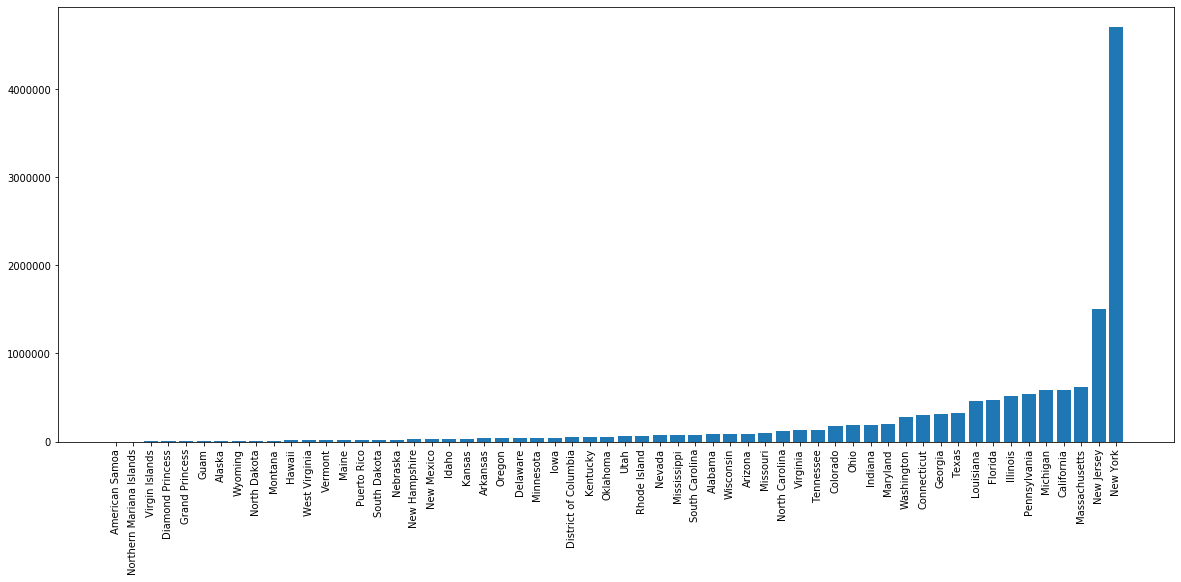

In [49]:
dates = list(us_melt_df['Date'].unique())
dates_ticks = [dates[i] if i % 7 == 0 else '' for i in range(len(dates))]

df_state = us_melt_df.groupby(['Province_State'])['Confirmed'].sum().reset_index()
df_state = df_state.sort_values(by=['Confirmed'])


plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.bar(x = df_state['Province_State'], height = df_state['Confirmed'])


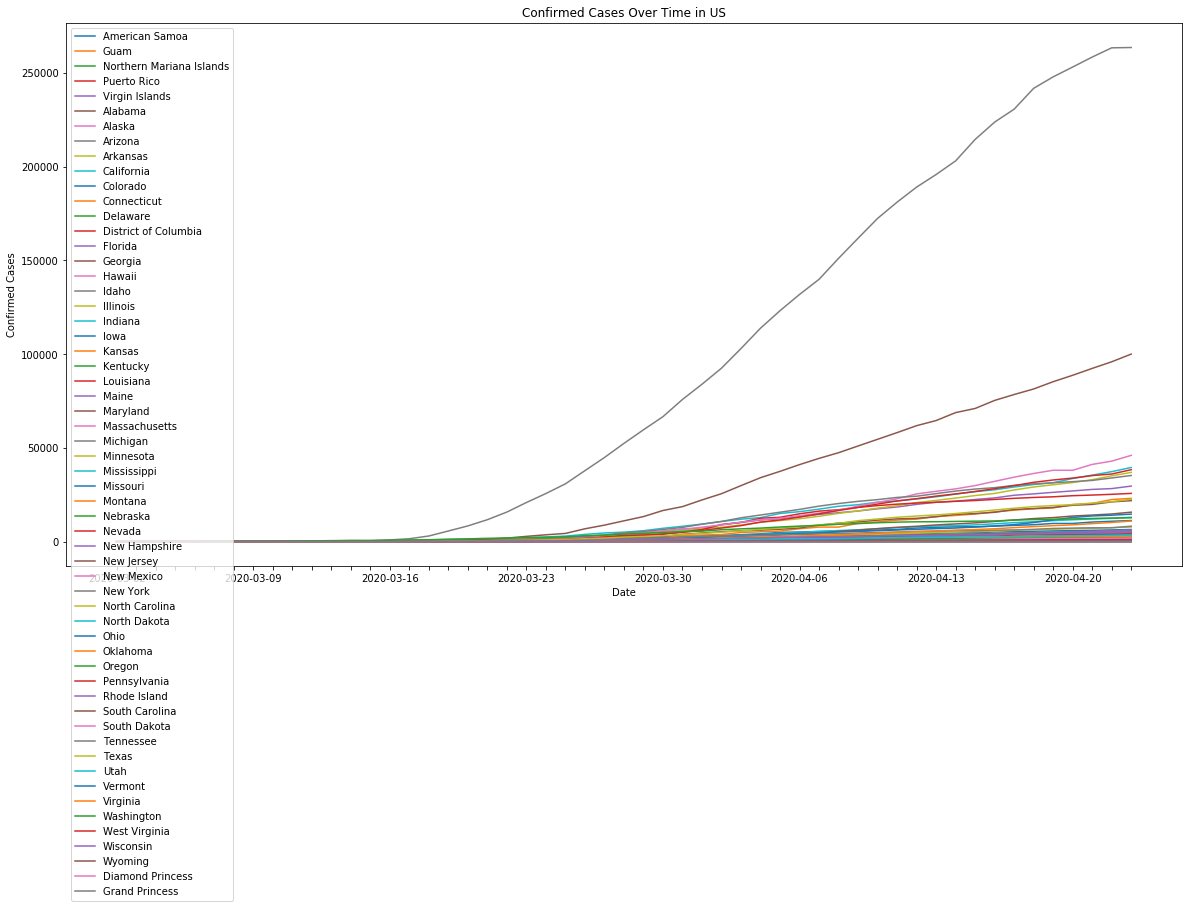

In [46]:
us_melt_df = us_melt_df.query('Date > "2020-03-01"')

f, ax = plt.subplots(1,1, figsize=(20,10))
states = list(us_melt_df['Province_State'].unique())

df_state = us_melt_df.groupby(['Province_State', 'Date'])['Confirmed'].sum()

for state in states:
    ax.plot(dates, 
            list(df_state[state]), 
            label=state)
    
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.set_xticklabels(dates_ticks)
ax.legend(loc='upper left')
ax.set_title('Confirmed Cases Over Time in US')

plt.savefig("us_confirmed.jpeg", dpi=200)


Georgia
https://dph.georgia.gov/covid-19-daily-status-report


In [55]:
df_GA = pd.read_csv("COVID-19_Deaths_in_Georgia.csv")

df_GA

,Age,Gender,County,Underlying
0,NaN,MALE,APPLING,Unk
1,82.0,MALE,APPLING,Yes
2,71.0,MALE,APPLING,Yes
3,69.0,MALE,APPLING,Unk
4,70.0,MALE,BACON,Yes
...,...,...,...,...
891,82.0,MALE,NON-GEORGIA RESIDENT,Yes
892,68.0,MALE,NON-GEORGIA RESIDENT,Unk
893,71.0,MALE,NON-GEORGIA RESIDENT,Yes
894,53.0,MALE,NON-GEORGIA RESIDENT,Unk


In [60]:
df_GA.groupby(["Age", "Gender", "County"]).size()

Age    Gender  County  
22.0   FEMALE  MUSCOGEE    1
27.0   FEMALE  LEE         1
28.0   MALE    SUMTER      1
29.0   FEMALE  HOUSTON     1
               PEACH       1
                          ..
99.0   FEMALE  DEKALB      1
               RANDOLPH    1
100.0  FEMALE  FULTON      1
               GREENE      1
101.0  FEMALE  FULTON      1
Length: 741, dtype: int64

In [59]:
(df_GA.groupby(["Age", "Gender", "County"]).size() == 1).sum()

630

Out of 895 records, there are 630 people could be unqiuely identified by quasi-identifiers "Age", "Gender", and "County".


In [61]:
k_anonymity = min(df_GA.groupby(["Age", "Gender", "County"]).size())

print("k_anonymity is " + str(k_anonymity))

k_anonymity is 1
